In [0]:
import pandas as pd

In [0]:
import sys
sys.path.insert(0, '/content/drive/My Drive/EEW/')
import Function_sous_comptage_func as ssf

import imp
imp.reload(ssf)

<module 'Function_sous_comptage_func' from '/content/drive/My Drive/EEW/Function_sous_comptage_func.py'>

In [0]:
Function_sous_comptage_func.print_toto()

toto


# Nouvelle section

In [0]:
from google.colab import drive
import rarfile

data = pd.read_pickle('/content/drive/My Drive/EEW/Data/abbeville_fev2020.pkl')

In [0]:
import rarfile
rar_path = rarfile.RarFile("/content/drive/My Drive/Reseauchaleur/Data/veolia-data-export-excel.rar")

In [0]:
for f in rar_path.infolist():
    print(f.filename, f.file_size)

data-04.01-31.08.2015-part1.xlsx 62972595
data-09.01.2015-31.01.2016-part2.xlsx 74259941
data-01.02-31.05.2016-part3.xlsx 67034976
data-01.06-30.09.2016-part4.xlsx 68517281
data-10.01-31.12.2016part5.xlsx 56858542


In [0]:
excel_file_name = "data-04.01-31.08.2015-part1.xlsx"
rar_file = rarfile.RarFile.open(rar_path, excel_file_name)
data_excel = pd.read_excel(rar_file)
data_excel.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/data-04.01-31.08.2015-part1.pkl")

In [0]:
excel_file_name = "data-09.01.2015-31.01.2016-part2.xlsx"
rar_file = rarfile.RarFile.open(rar_path, excel_file_name)
data_excel = pd.read_excel(rar_file)
data_excel.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/data-09.01.2015-31.01.2016-part2.pkl")

excel_file_name = "data-01.02-31.05.2016-part3.xlsx"
rar_file = rarfile.RarFile.open(rar_path, excel_file_name)
data_excel = pd.read_excel(rar_file)
data_excel.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/data-01.02-31.05.2016-part3.pkl")

excel_file_name = "data-01.06-30.09.2016-part4.xlsx"
rar_file = rarfile.RarFile.open(rar_path, excel_file_name)
data_excel = pd.read_excel(rar_file)
data_excel.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/data-01.06-30.09.2016-part4.pkl")

excel_file_name = "data-10.01-31.12.2016part5.xlsx"
rar_file = rarfile.RarFile.open(rar_path, excel_file_name)
data_excel = pd.read_excel(rar_file)
data_excel.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/data-10.01-31.12.2016part5.pkl")

In [0]:
file_list = ["/content/drive/My Drive/Reseauchaleur/Data/sst/data-04.01-31.08.2015-part1.pkl",
"/content/drive/My Drive/Reseauchaleur/Data/sst/data-09.01.2015-31.01.2016-part2.pkl",
"/content/drive/My Drive/Reseauchaleur/Data/sst/data-01.02-31.05.2016-part3.pkl",
"/content/drive/My Drive/Reseauchaleur/Data/sst/data-01.06-30.09.2016-part4.pkl",
"/content/drive/My Drive/Reseauchaleur/Data/sst/data-10.01-31.12.2016part5.pkl"]

In [0]:
def convert_to_date(d):
  from datetime import datetime
  dt = datetime.strptime(d, "%b %d %Y %I:%M%p")
  return dt


In [0]:
variable = 'SS_DHN_Flow_l_h'
file_exp = "/content/drive/My Drive/Reseauchaleur/Data/sst/" + variable + ".pkl"
list_df_ = []
for f in file_list:
  data = pd.read_pickle(f)
  df_ = data.pivot_table(index='ScadaReportDateTime',columns='SubstationName',values=variable)
  list_df_.append(df_)   

df_Glob = pd.concat(list_df_)
df_Glob.index = df_Glob.index.map(convert_to_date)
df_Glob = df_Glob.loc[~df_Glob.index.duplicated(keep='first')]
df_Glob.sort_index(inplace=True)
df_Glob.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/sst/" + variable + ".csv")

In [0]:
import pandas as pd
df = pd.read_pickle("/content/drive/My Drive/Reseauchaleur/Data/sst/SS_DHN_T_inlet_C.pkl")
df_sst_power = pd.read_pickle("/content/drive/My Drive/Reseauchaleur/Data/sst/SS_DHN_Power_kW.pkl")

In [0]:
df_ = df['002/3,4']

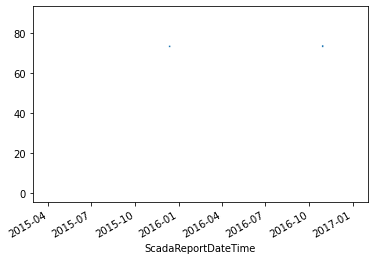

In [0]:
df['002/3,4'].plot()

In [0]:

import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=df_Glob.index, y=df_Glob['146/4'])])
fig.show()

In [0]:
df['002/3,4'].iplot(kind='scatter', title='Collisions Per Day')

AttributeError: ignored

In [0]:
import plotly.express as px

fig = px.scatter(df, x=df.index, y=df['002/3,4'])
fig.show()

In [0]:
df_Glob.count().sort_values()

111/1,2-вх. 2 БГВ       64
218/7                  223
211/2                  223
123/1                  223
124/1                  343
                     ...  
151/4,5              14002
151/1                14002
026/1                14006
004/1,2              14007
146/4                14043
Length: 367, dtype: int64

In [6]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
#d_vc  = pd.read_csv(savepath,sep=';',decimal=",",parse_dates=['Timestamp'],date_parser=dateparse,low_memory = False,na_values=' ')
 
df_plant = pd.read_csv('/content/drive/My Drive/Reseauchaleur/Data/Plant_data_2016.csv',sep=';',parse_dates=['Time'],date_parser=dateparse,index_col=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [0]:
df_plant.to_pickle("/content/drive/My Drive/Reseauchaleur/Data/Plant_data.pkl")